In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

data = pd.read_csv('/content/diabetes_data.csv')

X = data[['Glucose', 'BloodPressure']]
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

new_data = {}
for column in X.columns:
    value = float(input(f"Enter value for {column}: "))
    new_data[column] = value

new_data_df = pd.DataFrame([new_data])
predicted_class = naive_bayes_classifier.predict(new_data_df)
predicted_probabilities = naive_bayes_classifier.predict_proba(new_data_df)

print("Predicted class:", predicted_class[0])
# print("Positive class probability:", predicted_probabilities[0][1])
# print("Negative class probability:", predicted_probabilities[0][0])
# print("Predicted class for input data:", predicted_class)
# Calculate the confusion matrix
y_pred = naive_bayes_classifier.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Enter value for Glucose: 17
Enter value for BloodPressure: 49
Predicted class: 0
Confusion Matrix:
[[86 13]
 [24 31]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

data = pd.read_csv('/content/diabetes_data.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

new_data = {}
for column in X.columns:
    value = float(input(f"Enter value for {column}: "))
    new_data[column] = value

new_data_df = pd.DataFrame([new_data])
predicted_class = decision_tree_classifier.predict(new_data_df)
print("Predicted class for input data:", predicted_class[0])

y_pred = decision_tree_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Calculate the confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Enter value for Pregnancies: 55
Enter value for Glucose: 89
Enter value for BloodPressure: 90
Enter value for SkinThickness: 67
Enter value for Insulin: 56
Enter value for BMI: 26
Enter value for DiabetesPedigreeFunction: 23
Enter value for Age: 24
Predicted class for input data: 0
Accuracy on the test set: 0.7532467532467533
Confusion Matrix:
[[76 23]
 [15 40]]


Dataset Overview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Enter the number of clusters (k): 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


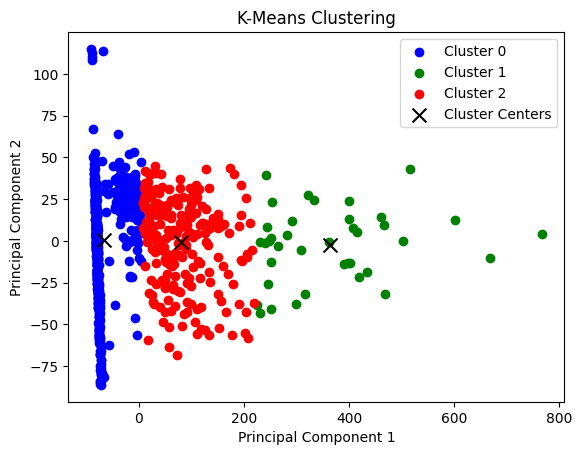

Cluster 0 - Center: [  3.92240588 113.61928375  67.56317723  15.02157943  14.39843893
  30.74314968   0.43316575  33.49586777   0.30045914], Number of Points: 495
Cluster 1 - Center: [  4.08600917 158.43807339  71.80733945  32.1983945  441.97362385
  35.20951835   0.57056078  34.99655963   0.59174312], Number of Points: 38
Cluster 2 - Center: [  3.56700429 130.0038956   71.5009739   30.39384496 159.55707051
  33.87331515   0.52866147  31.88352162   0.41780288], Number of Points: 235


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

data = pd.read_csv('/content/diabetes_data.csv')
sample_size = min(1000, len(data))
if len(data) > sample_size:
    data = data.sample(n=sample_size)
print("Dataset Overview:")
print(data.head())
k = int(input("Enter the number of clusters (k): "))
X = data.select_dtypes(include=[np.number])
kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
data['Cluster'] = labels
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for cluster in range(k):
    cluster_data = reduced_data[data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster],
                label=f'Cluster {cluster}')
cluster_centers = kmeans.cluster_centers_
cluster_centers = pca.transform(cluster_centers)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x',
            s=100, label='Cluster Centers')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering")
plt.legend()
plt.show()
for cluster in range(k):
    cluster_center = kmeans.cluster_centers_[cluster]
    num_points = len(data[data['Cluster'] == cluster])
    print(f"Cluster {cluster} - Center: {cluster_center}, Number of Points: {num_points}")